In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [16]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### 2. Load and prepare the dataset
Load the training data into a dataframe named df_train_data 
Create binary classification problem - rename some class labels
Create a dataframe of 9 features named X, drop column 9.
Create a data frame of labels named y, select only column 9.
Split the data into a training set and a test set.

In [9]:
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst'
                            , header=None, sep=' ')

# Create a binary classification
df_train_data.loc[df_train_data[9] != 4, [9]] = 0
df_train_data.loc[df_train_data[9] == 4, [9]] = 1


X = df_train_data.drop([9], axis=1)

y = df_train_data[9]

In [10]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: 9, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 3. Create the model
Instantiate a Logistic Regression classifier with a lbfgs solver.
Fit the classifier to the data.

In [12]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

### 4. Calculate Accuracy
Calculate and print the accuracy of the model on the test data.

In [13]:
lr.score(X_test, y_test)

0.8228965517241379

In [29]:
cvals = np.arange(.05, 1.5, .05)

scores = []

for c in cvals:
    lr = LogisticRegression(solver='lbfgs', penalty='none', C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))

    
plt.figure(figsize=(8,8))    
plt.plot(scores, cvals)

/home/owenhw/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


NameError: name 'X_yest' is not defined

### 5. Dummy Classifier
Use the dummy classifier to calculate the accuracy of a purely random chance.

Compare this result to the result of the logistic regression classifier above. What does this result tell you?

In [14]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.8482758620689655

Our model doesn't even do as well as the dummy classifier.

### 6. Confusion Matrix
Print the confusion matrix.
7. Plot a nicer confusion matrix (optional)
Use the plot_confusion_matrix function from above to plot a nicer looking confusion matrix.

In [15]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[  37  513]
 [ 129 2946]]


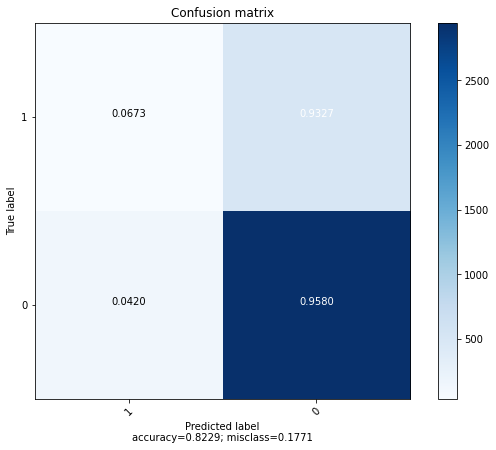

In [18]:
plot_confusion_matrix(cm=confusion, target_names=[1, 0])

### 8. Calculate Metrics
Print the F1, F beta, precision, recall and accuracy scores.

In [25]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Accuracy: ', accuracy
      , '\n', 'Precision: ', precision
     , '\n', 'Recall: ', recall
     , '\n', 'f1: ', f1)

Accuracy:  0.8228965517241379 
 Precision:  0.22289156626506024 
 Recall:  0.06727272727272728 
 f1:  0.10335195530726259


### 9. Print a classification report
10. Plot ROC Curve and AUC
Caculate AUC and plot the curve.

In [30]:
probabilities = lr.predict_proba(X_test)[:, 1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probabilities)

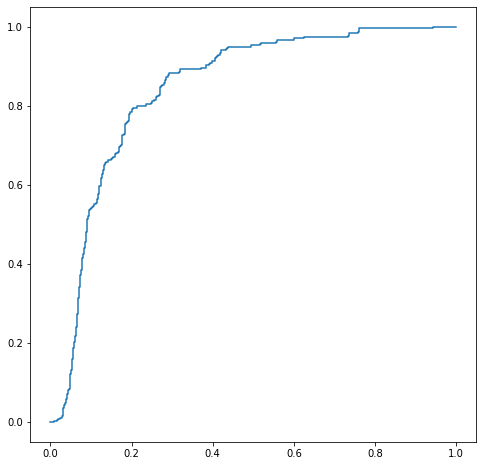

In [32]:
plt.figure(figsize=(8,8))
plt.plot(false_positive_rate, true_positive_rate)

### 11. Plot Precision-Recall Curve
Plot the precision-recall curve for the model above.

Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.

### 12. Cross Validation
Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.


### 13. Is this really linear?
Our linear classifier is not giving us accuracy better than the dummy classifier. Suppose that the data was not linearly separable? Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the Logistic Regression from above? What does that tell you about the data?

### 14. Random Forest
Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.